## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("white")

## Loading and understanding dataset

In [2]:
df = pd.read_csv("./Datasets/ex2data1.txt", header=None)
df.columns = ["Test_1_score", "Test_2_score", "Status"]
df.head()

,Test_1_score,Test_2_score,Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Test_1_score  100 non-null    float64
 1   Test_2_score  100 non-null    float64
 2   Status        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
df.describe()

,Test_1_score,Test_2_score,Status
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [5]:
print(f'Dataset shape: {df.shape}')

Dataset shape: (100, 3)


## Data Visualization

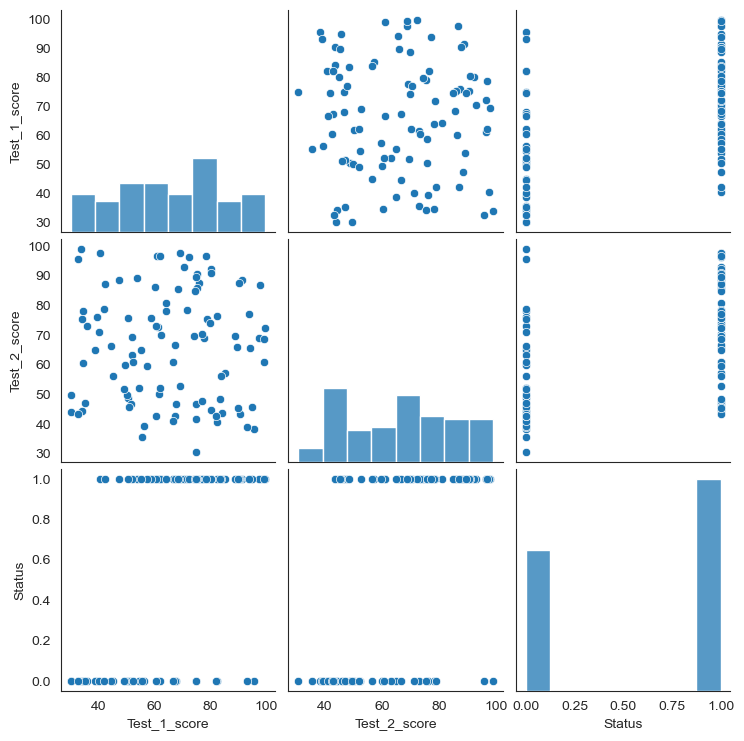

In [6]:
sns.pairplot(df)

<Axes: xlabel='Test_1_score', ylabel='Count'>

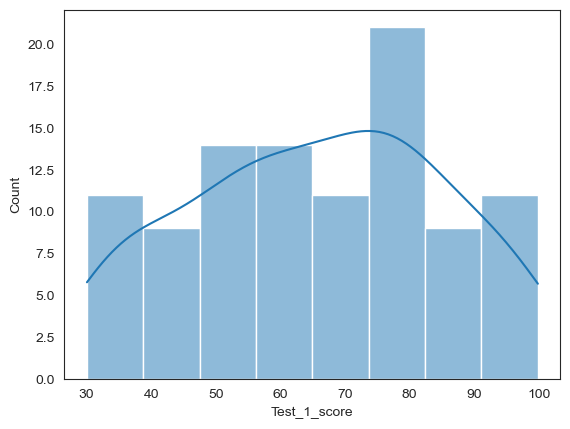

In [7]:
sns.histplot(df.iloc[:, 0], kde=True)

<Axes: xlabel='Test_2_score', ylabel='Count'>

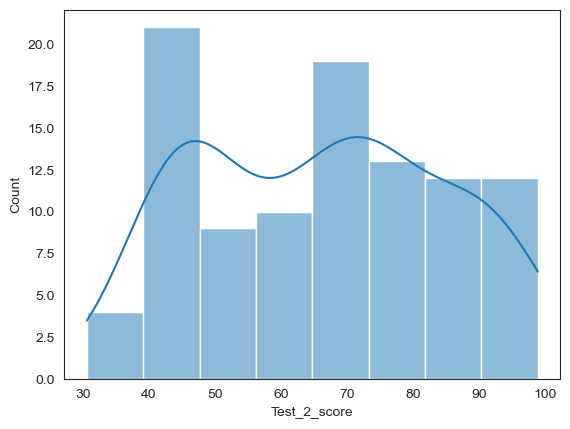

In [8]:
sns.histplot(df.iloc[:, 1], kde=True)

In [9]:
df.corr()

,Test_1_score,Test_2_score,Status
Test_1_score,1.000000,-0.023665,0.574057
Test_2_score,-0.023665,1.000000,0.512323
Status,0.574057,0.512323,1.000000


<Axes: >

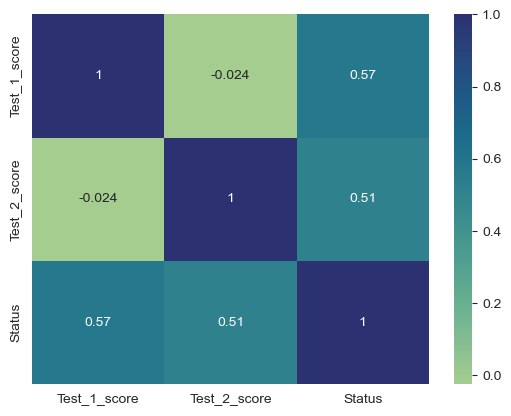

In [12]:
sns.heatmap(df.corr(), annot=True, cmap="crest")

## Train-Test dataset splitting

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.iloc[:, :2].to_numpy()
y = df.iloc[:, 2].to_numpy()
X.shape, y.shape

((100, 2), (100,))

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'x_train_shape: {x_train.shape}, y_train_shape: {y_train.shape}')
print(f'x_test_shape: {x_test.shape}, y_test_shape: {y_test.shape}')

x_train_shape: (80, 2), y_train_shape: (80,)
x_test_shape: (20, 2), y_test_shape: (20,)


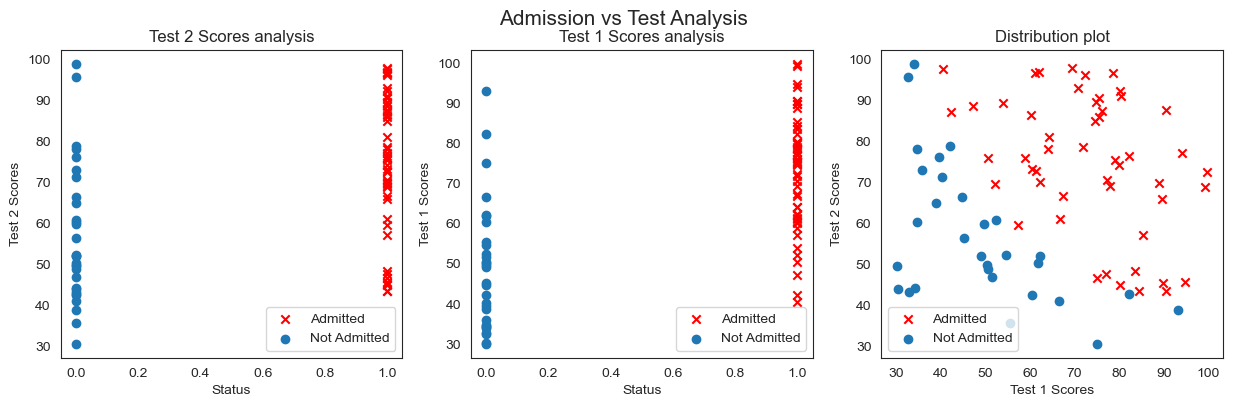

In [192]:
pos = y_train == 1
neg = y_train == 0
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].scatter(y_train[pos], x_train[pos, 1], marker="x", c="r", label="Admitted")
ax[0].scatter(y_train[neg], x_train[neg, 1], label="Not Admitted")
ax[0].set_xlabel("Status")
ax[0].set_ylabel("Test 2 Scores")
ax[0].set_title("Test 2 Scores analysis")
ax[0].legend()

ax[1].scatter(y_train[pos], x_train[pos, 0], marker="x", c="r", label="Admitted")
ax[1].scatter(y_train[neg], x_train[neg, 0], label="Not Admitted")
ax[1].set_xlabel("Status")
ax[1].set_ylabel("Test 1 Scores")
ax[1].set_title("Test 1 Scores analysis")
ax[1].legend()

ax[2].scatter(x_train[pos, 0], x_train[pos, 1], c="r", marker="x", label="Admitted")
ax[2].scatter(x_train[neg, 0], x_train[neg, 1], label="Not Admitted")
ax[2].set_xlabel("Test 1 Scores")
ax[2].set_ylabel("Test 2 Scores")
ax[2].set_title("Distribution plot")
ax[2].legend()

plt.suptitle("Admission vs Test Analysis", fontsize=15)
plt.subplots_adjust(wspace=0.2)
plt.show()

## Mathematical modelling (Model Training)

In [40]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

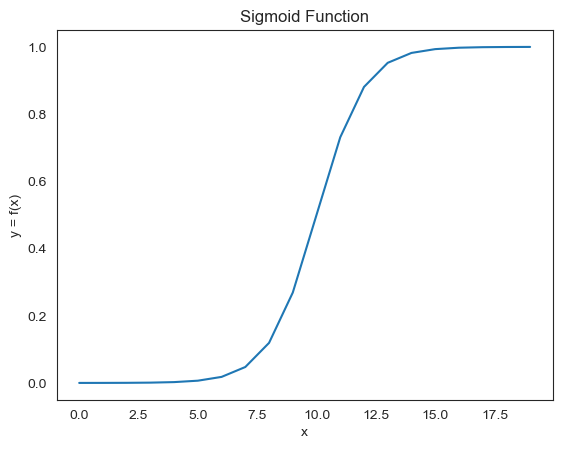

In [42]:
arr = np.arange(-10, 10)
graph = sigmoid(arr)
plt.plot(graph)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Sigmoid Function")
plt.show()

In [115]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m,)
    cost = 0.
    for i in range(m):
        f_wb[i] = np.dot(x[i], w) + b
        f_wb[i] = sigmoid(f_wb[i])
        cost += -(y[i]*np.log(f_wb[i])) - ((1-y[i])*np.log(1-f_wb[i]))
    cost /= m
    return cost

In [116]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost_in = compute_cost(x_train, y_train, test_w, test_b)
cost_in

0.19277754888208126

In [117]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    z = np.zeros(m,)
    f_wb = np.zeros(m,)
    for i in range(m):
        z[i] = np.dot(x[i], w) + b
        f_wb[i] = sigmoid(z[i])
        err = (f_wb[i] - y[i])
        for j in range(n):
            dj_dw[j] += (err * x[i, j])
        dj_db += err
    dj_db /= m
    dj_dw /= m
    return dj_dw, dj_db

In [118]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_dw_in, dj_db_in = compute_gradient(x_train, y_train, test_w, test_b)
dj_dw_in, dj_db_in

(array([-45.64259364, -46.71413941]), -0.6249999999993967)

In [119]:
import math, copy

In [120]:
def gradient_descent(x, y, w_in, b_in, gradient_func, cost_func, alpha, num_iters):
    m, n = x.shape
    w = copy.deepcopy(w_in)
    b = b_in
    j_history = []
    w_history = []
    b_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_func(x, y, w, b)
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i < 100000:
            cost = cost_func(x, y, w, b)
            j_history.append(cost)
            
        if (i % math.ceil(num_iters/10) == 0) or (i==num_iters-1):
            w_history.append(w)
            b_history.append(b)
            print(f'Iteration: {i:4d} ===> Cost: {float(j_history[-1])}')
            
    return w, b, j_history, w_history, b_history

In [128]:
w_initial = np.array([0., 0.])
b_initial = 0.
alpha = 1e-3
iterations = 80000

w_final, b_final, cost, weights, bias = gradient_descent(x_train, y_train,
                                        w_initial, b_initial, compute_gradient, compute_cost, alpha, iterations)
print(f'Trained parameters:')
print(f'Weights: {w_final.tolist()}, Bias: {b_final}')

Iteration:    0 ===> Cost: 0.6905074550113677
Iteration: 8000 ===> Cost: 0.5697100272434803
Iteration: 16000 ===> Cost: 0.539720197184573
Iteration: 24000 ===> Cost: 0.513330703156935
Iteration: 32000 ===> Cost: 0.4900545808609687
Iteration: 40000 ===> Cost: 0.4694586967535752
Iteration: 48000 ===> Cost: 0.45116565345582893
Iteration: 56000 ===> Cost: 0.4348511938484755
Iteration: 64000 ===> Cost: 0.42023921249832136
Iteration: 72000 ===> Cost: 0.40709582732295424
Iteration: 79999 ===> Cost: 0.39522481027366385
Trained parameters:
Weights: [0.04779337453479875, 0.026281130511190964], Bias: -4.026494490025754


## Accuracy on training dataset

In [129]:
def predictions(x, w = w_final, b = b_final):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(x[i], w) + b
        f_wb[i] = sigmoid(f_wb[i])
        if f_wb[i] > 0.5:
            f_wb[i] = 1
        else:
            f_wb[i] = 0
    return f_wb

In [135]:
def accuracy(x, y):
    m = x.shape[0]
    count = 0
    for i in range(m):
        if int(x[i]) == y[i]:
            count += 1
    acc = float(count / m ) * 100
    return acc

In [136]:
x_train_predictions = predictions(x_train)
x_train_accuracy = accuracy(x_train_predictions, y_train)

In [139]:
print(f'Training Accuracy: {x_train_accuracy}')

Training Accuracy: 87.5


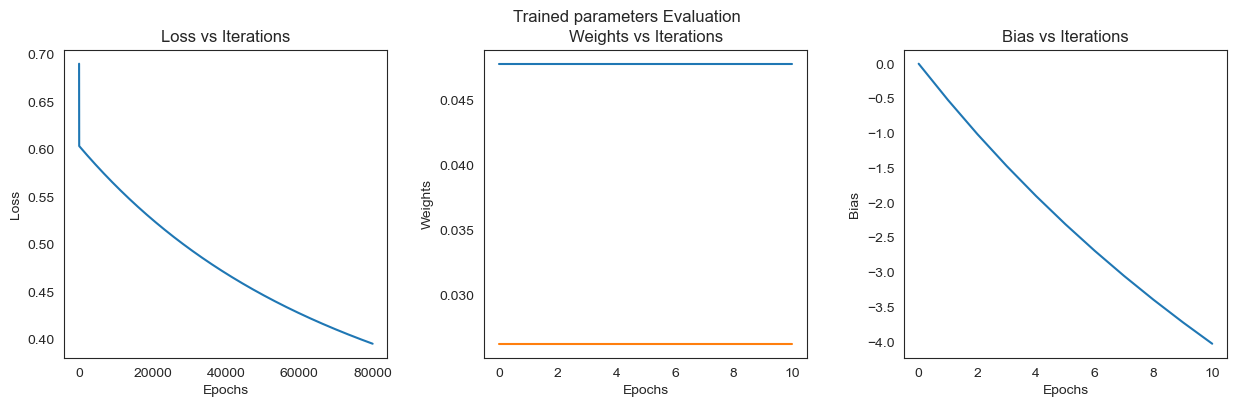

In [143]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
plots = [cost, weights, bias]
plot_labels = ["Loss", "Weights", "Bias"]

for i in range(3):
    ax[i].plot(plots[i])
    ax[i].set_ylabel(plot_labels[i])
    ax[i].set_xlabel("Epochs")
    ax[i].set_title(f'{plot_labels[i]} vs Iterations')
    
plt.subplots_adjust(wspace=0.3)
plt.suptitle("Trained parameters Evaluation")
plt.show()

In [145]:
def plot_graph(x, y, pos_label="y=1", neg_label="y=0"):
    pos = y == 1
    neg = y == 0
    plt.scatter(x[pos, 0], x[pos, 1], c="r", marker="x", label=pos_label)
    plt.scatter(x[neg, 0], x[neg, 1], c="b", label=neg_label)

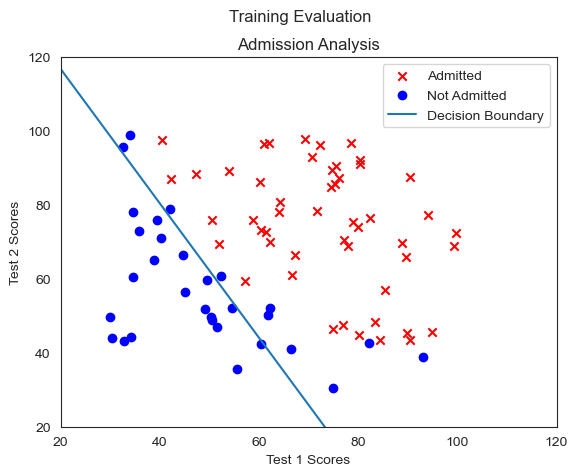

In [175]:
plot_graph(x_train, y_train, pos_label="Admitted", neg_label="Not Admitted")
plt.xlabel("Test 1 Scores")
plt.ylabel("Test 2 Scores")
plt.title("Admission Analysis")

x1 = -b_final / w_final[1]
x0 = -b_final / w_final[0]
plt.plot((0, x0), (x1, 0), label="Decision Boundary")

plt.ylim(20, 120)
plt.xlim(20, 120)

plt.suptitle("Training Evaluation")
plt.legend()
plt.show()

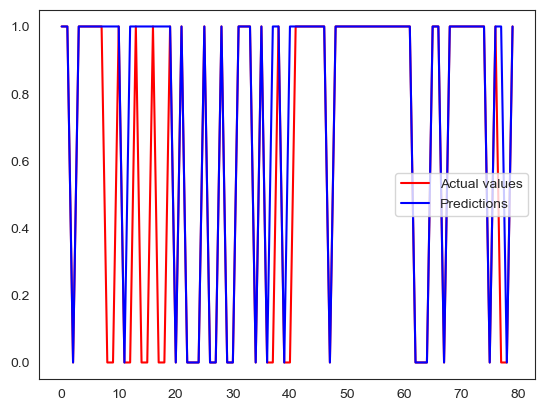

In [170]:
plt.plot(y_train, c="r", label="Actual values")
plt.plot(x_train_predictions, c="b", label="Predictions")
plt.legend()
plt.show()

## Evaluation on Testing Dataset

In [172]:
x_test_predictions = predictions(x_test)
x_test_accuracy = accuracy(x_test_predictions, y_test)
print(f'Testing accuracy: {x_test_accuracy}')

Testing accuracy: 70.0


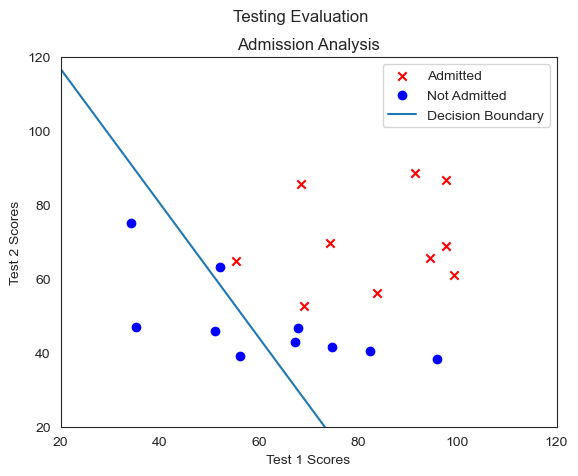

In [176]:
plot_graph(x_test, y_test, pos_label="Admitted", neg_label="Not Admitted")
plt.xlabel("Test 1 Scores")
plt.ylabel("Test 2 Scores")
plt.title("Admission Analysis")

x1 = -b_final / w_final[1]
x0 = -b_final / w_final[0]
plt.plot((0, x0), (x1, 0), label="Decision Boundary")

plt.ylim(20, 120)
plt.xlim(20, 120)

plt.suptitle("Testing Evaluation")
plt.legend()
plt.show()

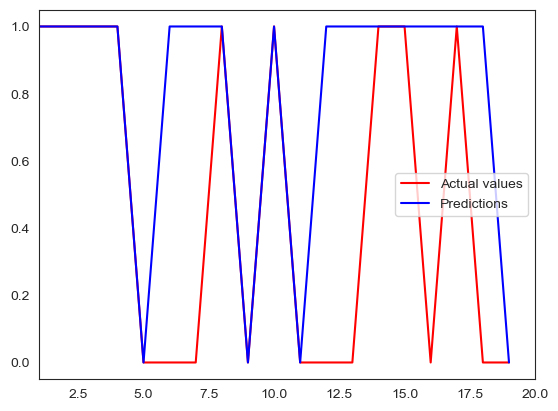

In [184]:
plt.plot(y_test, c="r", label="Actual values")
plt.plot(x_test_predictions, c="b", label="Predictions")
plt.xlim(1, 20)
plt.legend()
plt.show()

## Predictions

In [185]:
def predict(x, func=sigmoid, w=w_final, b=b_final):
    f_wb = np.dot(x, w) + b
    f_wb = func(f_wb)
    if f_wb > 0.5:
        f_wb = 1
    else:
        f_wb = 0
    return f_wb

In [188]:
res = predict(x_test[5])
print(f'Prediction: {res}')
print(f'True Label: {y_test[5]}')

Prediction: 0
True Label: 0


In [189]:
res = predict(x_test[18])
print(f'Prediction: {res}')
print(f'True Label: {y_test[18]}')

Prediction: 1
True Label: 0


In [193]:
## MODEL STATUS: TRAINED
## Trained parameters:
## Weights: [0.04779337453479875, 0.026281130511190964], Bias: -4.026494490025754
## Training Accuracy: 87.5%
## Testing Accuracy: 70.0%